Import the necessary libraries

In [ ]:
# Import library
import numpy as np # for linear algebra
import pandas as pd # data processing for CSV file
import seaborn as sns # for creating plots
import matplotlib.ticker as mtick # for specifying axes tick format
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Read the csv data and save it as dataframe, print the first five rows of given dataset

In [ ]:
df_initial = pd.read_csv("/content/sample_data/Telco-Customer-Churn-Data.csv")
display(df_initial.shape)
df_initial.head()

(7051, 21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Locate unique customerIDs only

In [ ]:
df_initial.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df_current = df_initial.drop_duplicates(subset='customerID' , keep='first', inplace=False)

Print the datatype for all the columns

In [ ]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_current.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#convert the datatype of tenure into float
df_current = df_current.astype({'tenure': 'float64'})

In [ ]:
df_current['TotalCharges'] = pd.to_numeric(df_current['TotalCharges'], errors='coerce')

In [ ]:
df_current.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#read the mean, min, max and quartile values for numerical values
df_current.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#Feature Engineering

In [ ]:
#check for empty cells
df_current.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_current = df_current.dropna()

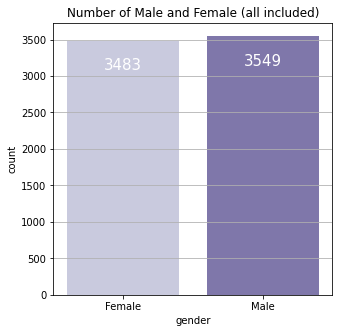

In [ ]:
#frequency distribution of male and female after dropping empty cells
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df_current['gender'], palette="Purples")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=15)
    ax.set_title('Number of Male and Female (all included)')
    ax.grid('on', which='minor', axis='y' )
    ax.grid('on', which='major', axis='y' )

In [ ]:
df_current['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

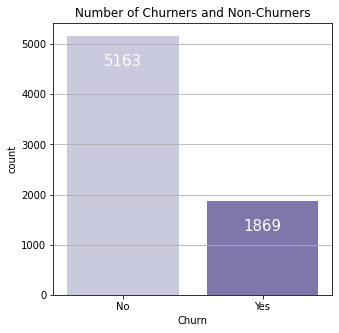

In [ ]:
#frequency distribution of churners and non churners
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df_current['Churn'], palette="Purples")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=15)
    ax.set_title('Number of Churners and Non-Churners')
    ax.grid('on', which='minor', axis='y' )
    ax.grid('on', which='major', axis='y' )

**OR**

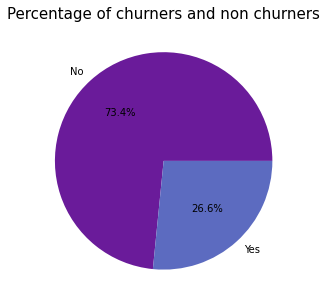

In [ ]:
#Piechart color taken from https://redketchup.io/color-picker
plt.figure(figsize=(5,5))
colors = ['#6A1B9A','#5C6BC0']
plt.pie(df_current['Churn'].value_counts(),labels = df_current['Churn'].value_counts().index, colors = colors, autopct='%.1f%%')
plt.title("Percentage of churners and non churners", fontsize=15);
plt.show()

In [ ]:
# a function to generate boxplots
plots = {1: [111], 2:[121, 122], 3: [131,132,133],
         4: [221, 222, 223, 224], 5: [231,232,233,234,235], 6:[231,232,233,234,235,236]}

def boxplot(x_axis, y_axis, df):

    rows = int(str(plots[len(y_axis)][0])[0])
    columns = int(str(plots[len(y_axis)][0])[1])
    plt.figure(figsize=(6*columns, 6*rows))

    for i, j in enumerate(y_axis):
        plt.subplot(plots[len(y_axis)][i])
        ax = sns.boxplot(x=x_axis, y=j, data=df[[x_axis, j]], palette="Purples")
        ax.set_title(j)
        ax.grid('on', which='minor', axis='y' )
        ax.grid('on', which='major', axis='y' )

    return plt.show()

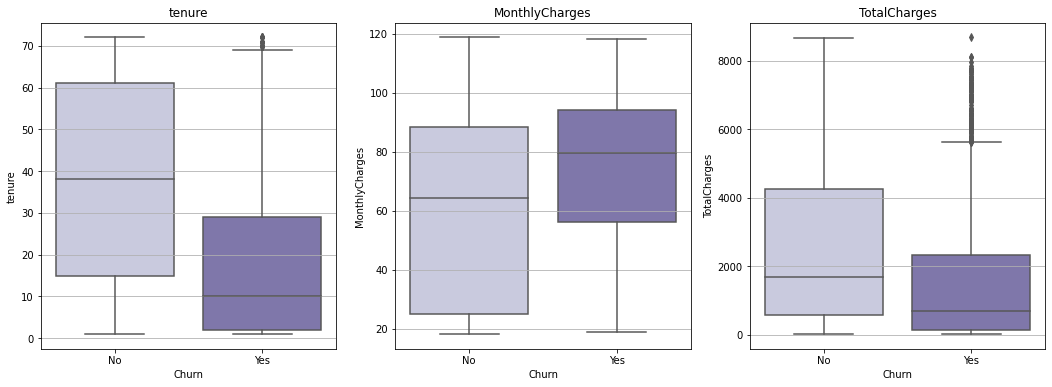

In [ ]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df_current)

In [ ]:
# Using Interquartile Range (IQR) to find data that lie outside IQR borders int the numerical features
df_numerical = df_current[["tenure", "MonthlyCharges", "TotalCharges"]]
df_numerical.describe()

Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [ ]:
# a function to generate countplots:
def countplot_for_churn(x, y, df):

    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])

    plt.figure(figsize=(10*columns, 10*rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Purples', edgecolor='black')
        for p in ax.patches:
          ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
        ax.set_title('Churn based on ' + j)
        ax.grid('on', which='minor', axis='y' )
        ax.grid('on', which='major', axis='y' )
    return plt.show()

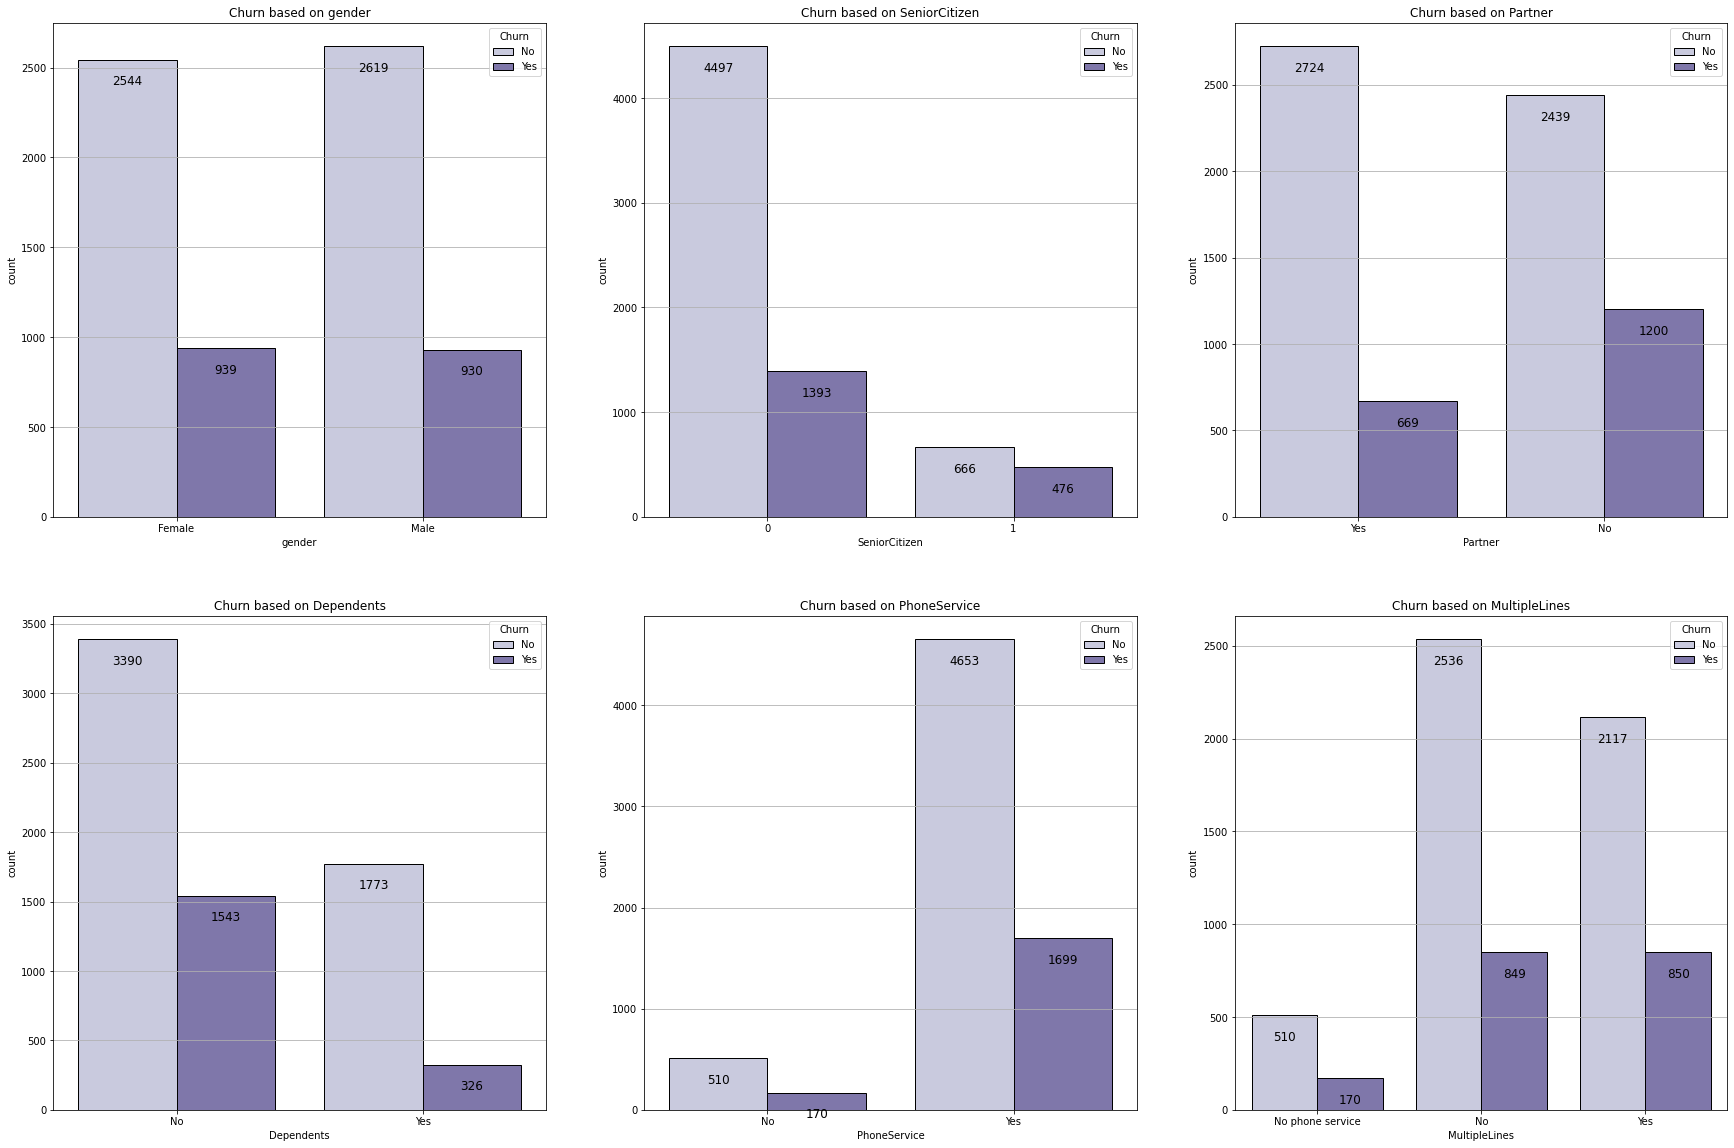

In [ ]:
# countplots for various features.
countplot_for_churn("Churn", ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines'], df_current)

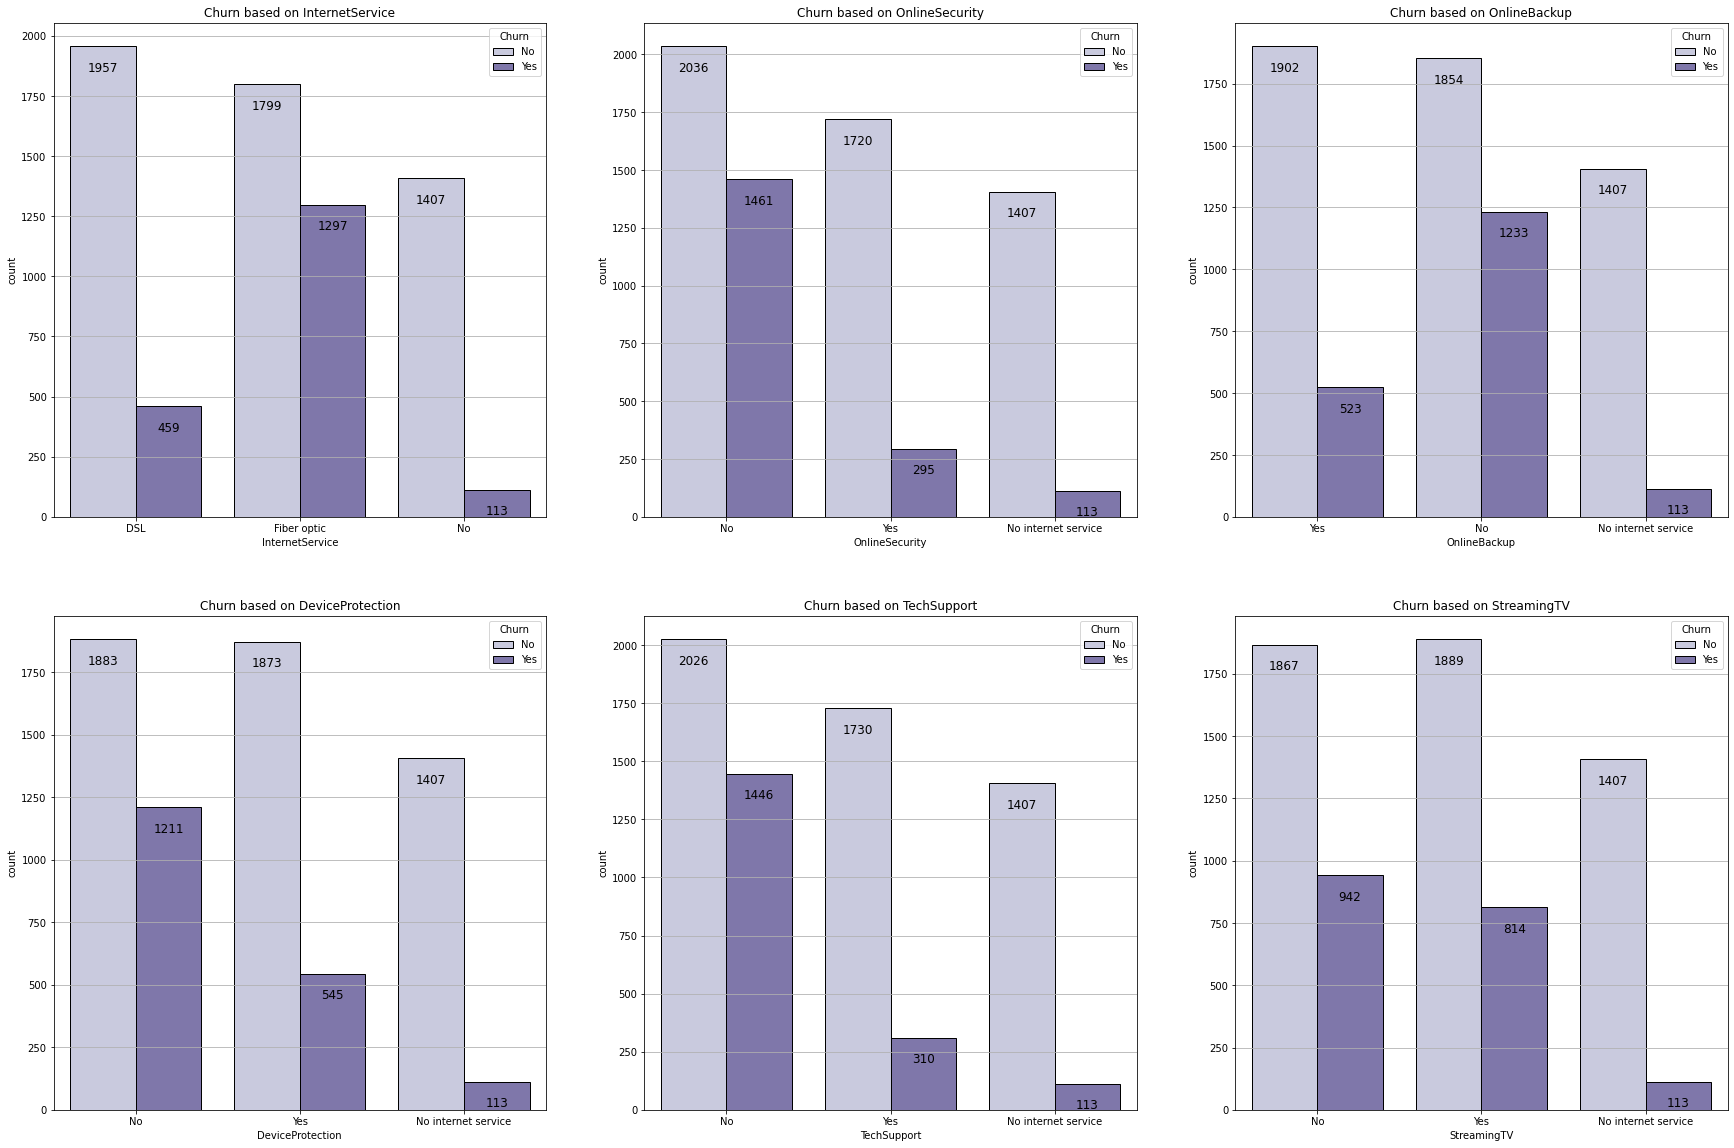

In [ ]:
# countplots for various features.
countplot_for_churn("Churn", ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV'], df_current)

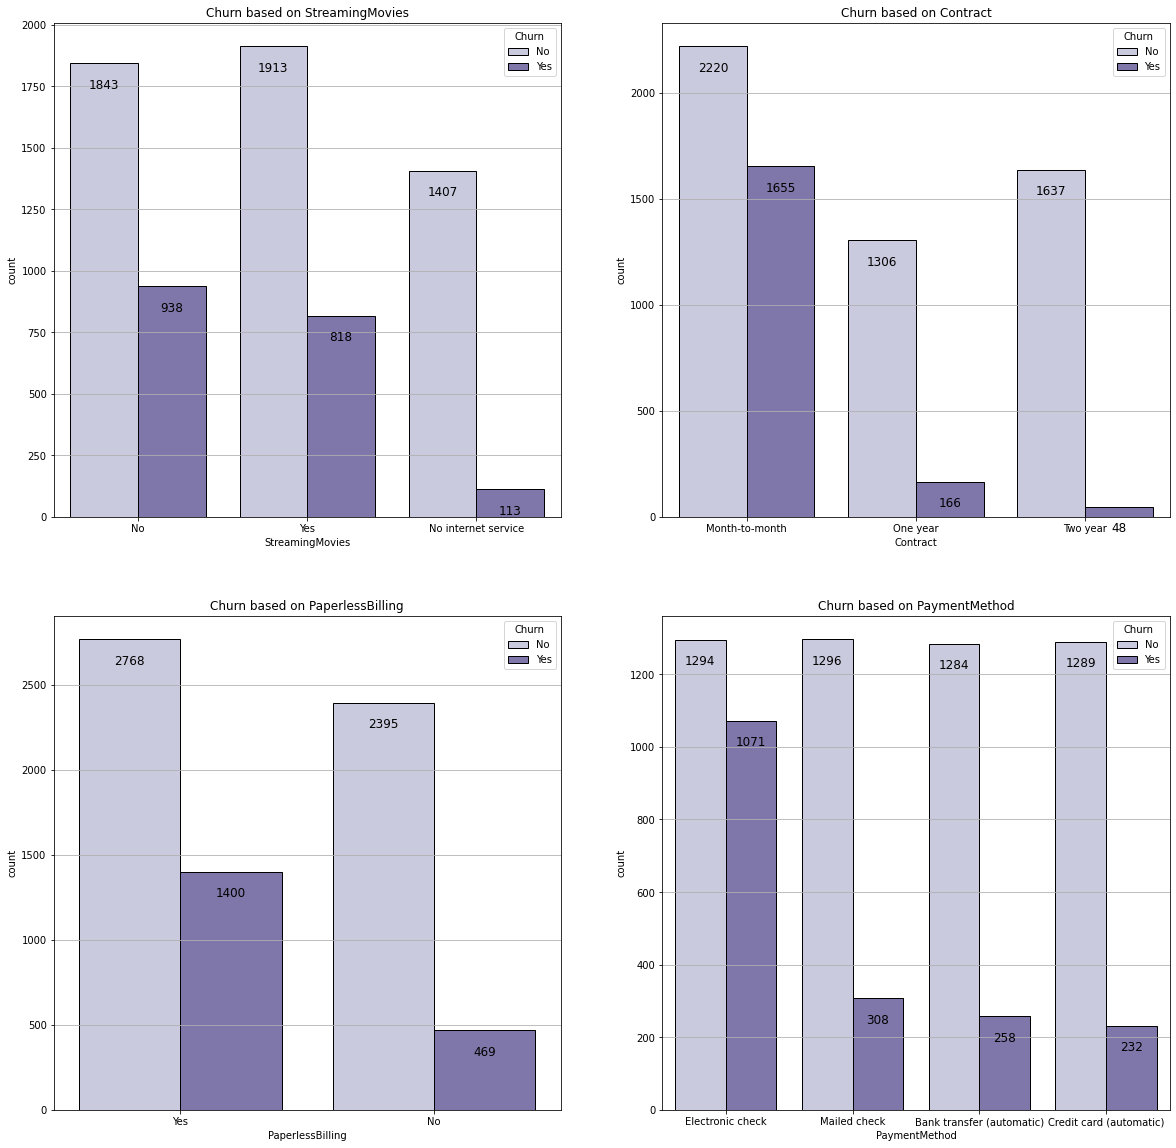

In [ ]:
# countplots for various features.
countplot_for_churn("Churn", ['StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'], df_current)

In [ ]:
# function for label encoding
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

In [ ]:
# Label encoding for the data: gender, Partner, Dependents, Churn, PhoneService, PaperlessBilling (These features are categorical--> hence converted into binary vectors)
label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df_current)
df_current['gender'] = df_current['gender'].map({'Female': 1, 'Male': 0})

In [ ]:
# MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
# features above are categorical and take more than two values. --> One Hot Encoding
features_OHE = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df_current = pd.get_dummies(df_current, columns=features_OHE)

In [ ]:
# numerical features: tenure, TotalCharges,MonthlyCharges --> min-max scaling
from sklearn.preprocessing import MinMaxScaler

df_numerical_features_MMS = pd.DataFrame(df_current, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
df_rest_features = df_current.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
rescaled_features = MinMaxScaler().fit_transform(df_numerical_features_MMS)
df_rescaled_features = pd.DataFrame(rescaled_features, columns=['tenure', 'MonthlyCharges', 'TotalCharges'], index=df_rest_features.index)
df_current = pd.concat([df_rest_features, df_rescaled_features], axis=1)

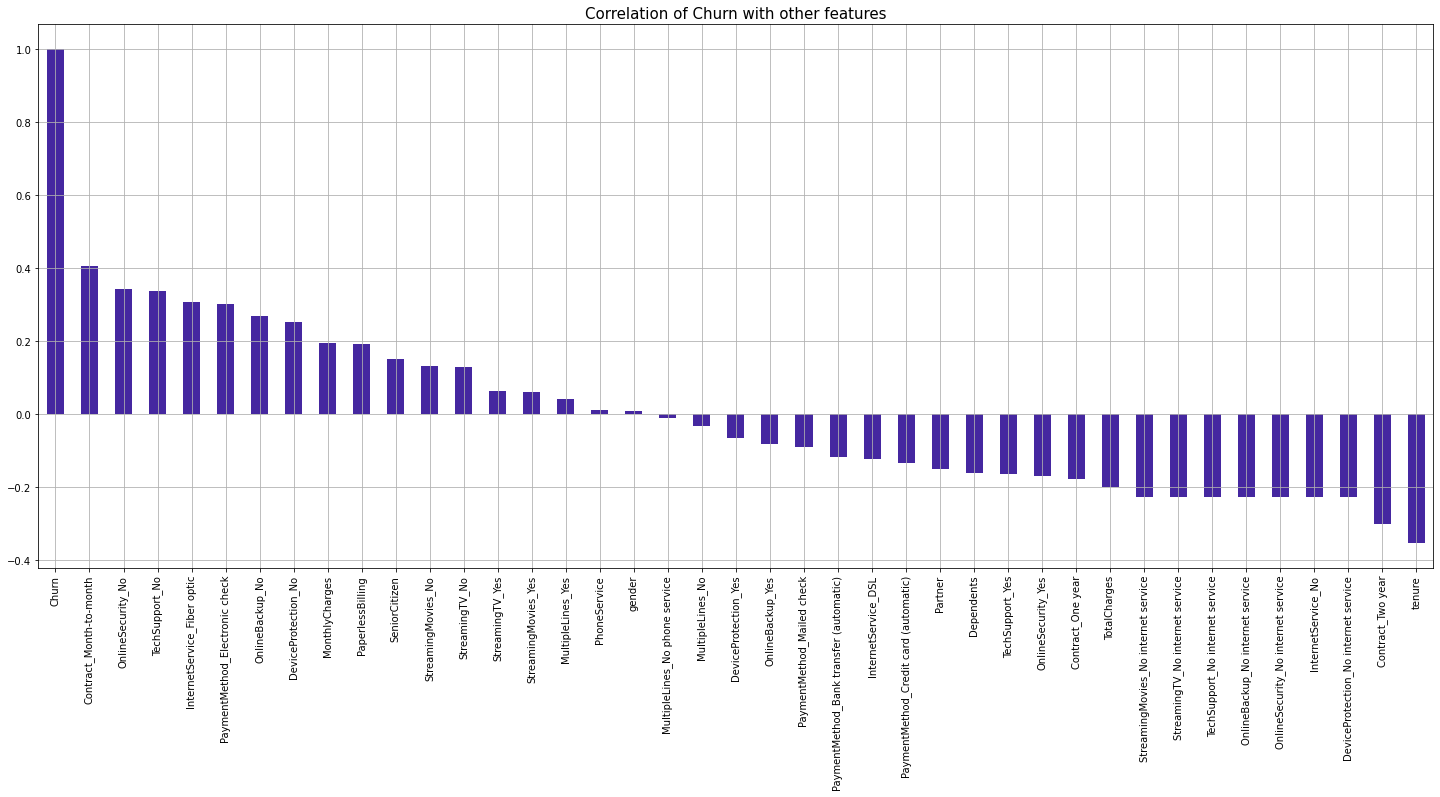

In [ ]:
# correlation plot for correlation of Churn with each of the remaining features
plt.figure(figsize=(16,10))
df_current.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='#4527A0', figsize=(25,10))
plt.title("Correlation of Churn with other features", fontsize=15);
plt.grid()
plt.show()

In [ ]:
# customerID is not relevant for Machine Learning, so it is dropped
df_current = df_current.drop(columns='customerID')

#Train-Test-Split

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [ ]:
#sklearn's splitter function train_test_split
from sklearn.model_selection import train_test_split

X1 = df_current.drop('Churn', axis=1)
X = X1.values
y = df_current['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):

      print('-'*60)
      print(f'            Classification Report for {classifier_name}' )
      print('-'*60)
      print(classification_report(y_test, y_pred))
      print('-'*60)
      print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
      print('-'*60)
      print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')

      fig, ax = plt.subplots(figsize=(7, 6))
      plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Purples, normalize=None, ax=ax)
      ax.set_title(f'{classifier_name} - Confusion Matrix')
      plt.show()
      print('-'*60)
      return print("")

In [ ]:
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}', color='Purple')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    print('-'*60)
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [ ]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=f'{classifier_name}', color='Purple')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

    print('-'*60)
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

------------------------------------------------------------
            Classification Report for KNN
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.51      0.51       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.75      0.74      1407

------------------------------------------------------------
Accuracy Score Test: 0.7455579246624022
------------------------------------------------------------
Accuracy Score Train: 0.8371555555555555 (as comparison)


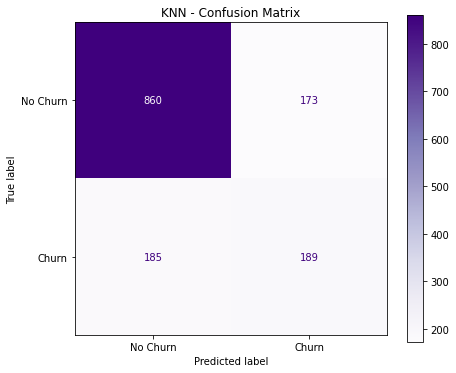

------------------------------------------------------------



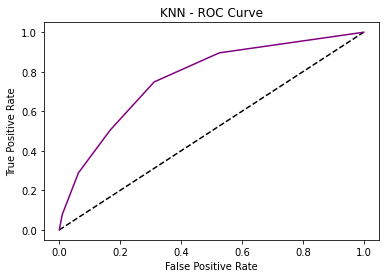

------------------------------------------------------------
AUC Score (ROC): 0.7675932205144664



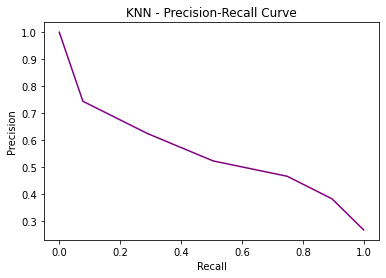

------------------------------------------------------------
F1 Score: 0.5135869565217392 
AUC Score (PR): 0.5523161877972685



In [ ]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

------------------------------------------------------------
            Classification Report for Log. Regression
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

------------------------------------------------------------
Accuracy Score Test: 0.7874911158493249
------------------------------------------------------------
Accuracy Score Train: 0.8071111111111111 (as comparison)


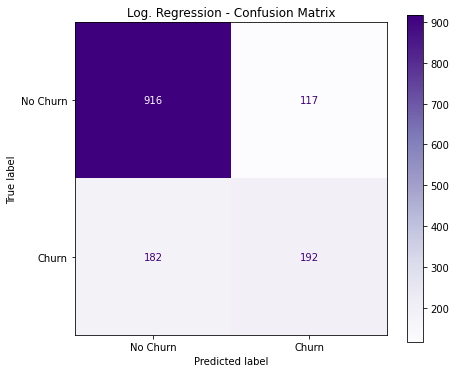

------------------------------------------------------------



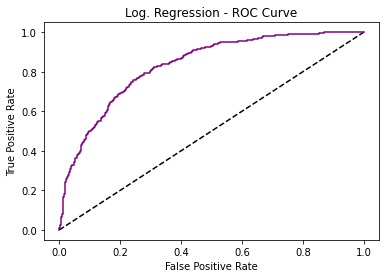

------------------------------------------------------------
AUC Score (ROC): 0.8316284535463399



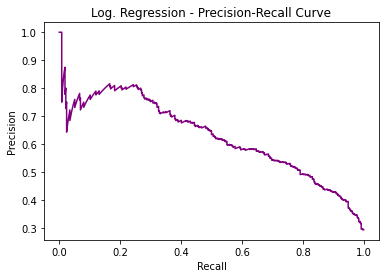

------------------------------------------------------------
F1 Score: 0.5622254758418741 
AUC Score (PR): 0.6272968401105458



In [ ]:
# Plot model evaluations.
#feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

------------------------------------------------------------
            Classification Report for Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

------------------------------------------------------------
Accuracy Score Test: 0.7818052594171997
------------------------------------------------------------
Accuracy Score Train: 0.9975111111111111 (as comparison)


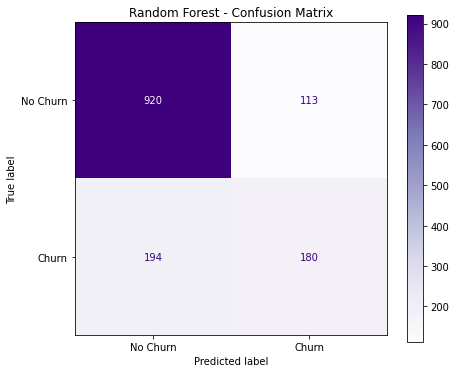

------------------------------------------------------------



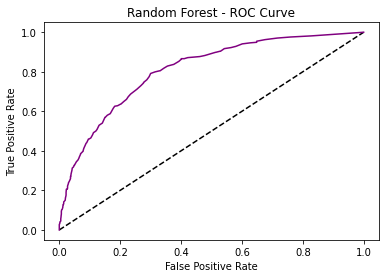

------------------------------------------------------------
AUC Score (ROC): 0.8083226778346647



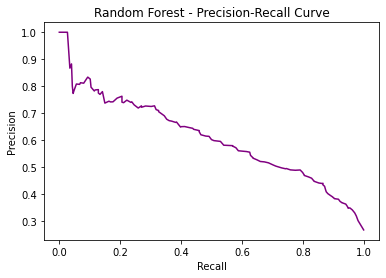

------------------------------------------------------------
F1 Score: 0.5397301349325337 
AUC Score (PR): 0.6076818448698649



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

------------------------------------------------------------
            Classification Report for SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

------------------------------------------------------------
Accuracy Score Test: 0.7860696517412935
------------------------------------------------------------
Accuracy Score Train: 0.8174222222222223 (as comparison)


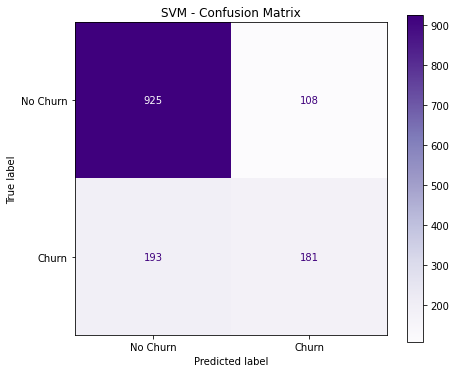

------------------------------------------------------------



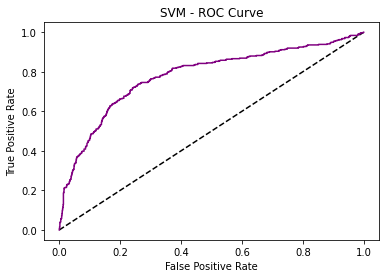

------------------------------------------------------------
AUC Score (ROC): 0.7787698464055163



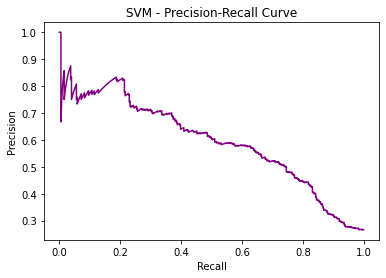

------------------------------------------------------------
F1 Score: 0.5460030165912519 
AUC Score (PR): 0.5947070512959438



In [ ]:
from sklearn.svm import SVC

# Instanciate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')